In [1]:
import torch as t
a = t.Tensor(3,3)
a

tensor([[-4.5704e+02,  9.4868e-43,  1.5461e+17],
        [ 5.8855e-44, -4.6584e+00,  9.4868e-43],
        [ 4.3440e-44,  9.4868e-43, -3.1893e+03]])

In [2]:
# view()函数，将多行Tensor，拼接成一行
a.view(1,-1)

tensor([[ 1.3733e-14,  1.2102e+25,  1.6992e-07,  2.9599e+21,  2.8175e+20,
          1.7566e+25,  1.7748e+28,  0.0000e+00,  0.0000e+00]])

In [69]:
# squeeze() 和 unsqueeze()
b = t.Tensor(3,1,4)
print(b,'\n\n\t',b.size())

tensor([[[ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.]]]) 

	 torch.Size([3, 1, 4])


In [68]:
b = t.Tensor(3,1,4).squeeze(0)# 参数0代表第一维度,squeeze(0)如果第一维度值为1，则去掉，否则不变
print(b,'\n\n\t',b.size())

tensor([[[ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.]]]) 

	 torch.Size([3, 1, 4])


In [67]:
t.Tensor(3,1,4).squeeze(0).size()

torch.Size([3, 1, 4])

In [57]:
b.squeeze(1)# 参数1代表第二维度
print(b,'\n\n\t',b.size())

tensor([[[ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.]]]) 

	 torch.Size([3, 1, 4])


In [24]:
b.unsqueeze(0)

tensor([[[-0.1081,  0.9290, -0.0519],
         [ 0.0837, -1.1818,  1.6718]]])

In [25]:
b.unsqueeze(1)

tensor([[[-0.1081,  0.9290, -0.0519]],

        [[ 0.0837, -1.1818,  1.6718]]])

In [26]:
b.numel()# 返回tensor中元素的个数

6

In [63]:
import numpy as np
x = np.random.rand(2,3,3)
x

array([[[ 0.91498251,  0.62433221,  0.969374  ],
        [ 0.69164461,  0.86542409,  0.93935447],
        [ 0.9907821 ,  0.02126888,  0.83379586]],

       [[ 0.61679697,  0.27839374,  0.66914182],
        [ 0.32646236,  0.22425935,  0.31222748],
        [ 0.13508763,  0.58617435,  0.74950824]]])

In [7]:
t.Tensor(3).uniform_(1,2)

tensor([ 1.8631,  1.6089,  1.8233])

In [18]:
x = 'root/hdafdasfafaadj2i.jpg'

b = int(x.split('.')[-2].split('/')[-1])
b

ValueError: invalid literal for int() with base 10: 'hdafdasfafaadj2i'

In [20]:
x = 'root/hdafdasfa.faadj2i.jpg'
b = x.split('.')[-2].split('/')[-1]
b

'faadj2i'

In [33]:
a = t.arange(2,8)
print("原始tensor_1:\n",a)
print("\ntensor_1大小",a.size())

b = a.view(2,3)
print("\n改变tensor_1布局，得tensor_2:\n",b)
print("此时打印tensor_1:\n",a)

b[1,2]=8
print("\n改变tensor_2一个值:\n",b)
print("此时打印tensor_1:\n",a)

原始tensor_1:
 tensor([ 2.,  3.,  4.,  5.,  6.,  7.])

tensor_1大小 torch.Size([6])

改变tensor_1布局，得tensor_2:
 tensor([[ 2.,  3.,  4.],
        [ 5.,  6.,  7.]])
此时打印tensor_1:
 tensor([ 2.,  3.,  4.,  5.,  6.,  7.])

改变tensor_2一个值:
 tensor([[ 2.,  3.,  4.],
        [ 5.,  6.,  8.]])
此时打印tensor_1:
 tensor([ 2.,  3.,  4.,  5.,  6.,  8.])


In [34]:
a = t.arange(0, 16).view(4, 4)
a

tensor([[  0.,   1.,   2.,   3.],
        [  4.,   5.,   6.,   7.],
        [  8.,   9.,  10.,  11.],
        [ 12.,  13.,  14.,  15.]])

In [40]:
di = t.LongTensor([[0,1,2,3]]).t()
di

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3]])

In [35]:
# 选取对角线的元素
index = t.LongTensor([[0,1,2,3]])
a.gather(0, index)

tensor([[  0.,   5.,  10.,  15.]])

In [36]:
# 选取反对角线上的元素
index = t.LongTensor([[3,2,1,0]]).t()
a.gather(1, index)

tensor([[  3.],
        [  6.],
        [  9.],
        [ 12.]])

In [42]:
a = t.ones(3, 2)
b = t.zeros(2, 3,1)

# 自动广播法则
# 第一步：a是2维,b是3维，所以先在较小的a前面补1 ，
# 即：a.unsqueeze(0)，a的形状变成（1，3，2），b的形状是（2，3，1）,
# 第二步: a和b在第一维和第三维形状不一样，其中一个为1 ，
# 可以利用广播法则扩展，两个形状都变成了（2，3，2）
a+b

tensor([[[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]],

        [[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]]])

In [43]:
# 手动广播法则
# 或者 a.view(1,3,2).expand(2,3,2)+b.expand(2,3,2)
a.unsqueeze(0).expand(2, 3, 2) + b.expand(2,3,2)

tensor([[[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]],

        [[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]]])

In [54]:
a = t.rand(8,1).uniform_(1,2)
print(a)
print(a*3)

tensor([[ 1.6229],
        [ 1.9575],
        [ 1.4342],
        [ 1.9799],
        [ 1.2583],
        [ 1.1112],
        [ 1.9413],
        [ 1.1765]])
tensor([[ 4.8688],
        [ 5.8725],
        [ 4.3025],
        [ 5.9396],
        [ 3.7749],
        [ 3.3335],
        [ 5.8240],
        [ 3.5294]])


In [74]:
import numpy as np
def f(x):
    '''计算y'''
    y = x**2 * t.exp(x)
    return y
def gradf(x):
    '''手动求导函数'''
    dx = 2*x*t.exp(x) + x**2*t.exp(x)
    return dx

from torch.autograd import Variable as V
x = V(t.Tensor(2,2).uniform_(1,2), requires_grad = True)
x

tensor([[ 1.5830,  1.0162],
        [ 1.5806,  1.1798]])

In [77]:
y = f(x)
y

tensor([[ 12.2015,   2.8532],
        [ 12.1359,   4.5288]])

In [78]:
y.backward(t.ones(y.size())) # grad_variables形状与y一致
x.grad

tensor([[ 27.6176,   8.4684],
        [ 27.4921,  12.2061]])

In [72]:
x = t.Tensor([1.5658])
c = 2*x*t.exp(x) + x**2*t.exp(x)
c

tensor([ 26.7246])

In [73]:
x = 1.5658
c = 2*x*(2.71828**x) + x**2*(2.71828**x)
c

26.724593728555057

### 3.2.4 小试牛刀: 用Variable实现线性回归
在上一节中讲解了利用tensor实现线性回归，在这一小节中，将讲解如何利用autograd/Variable实现线性回归，以此感受autograd的便捷之处。

In [1]:
import torch as t
import time
from torch.autograd import Variable as V
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

In [93]:
# 设置随机数种子，为了在不同人电脑上运行时下面的输出一致
t.manual_seed(1000)
def get_fake_data(batch_size=8):
    ''' 产生随机数据：y = x*2 + 3，加上了一些噪声'''
    x = t.rand(batch_size,1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1))*3
    return x, y

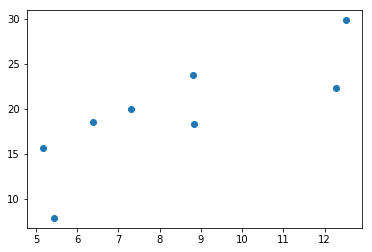

In [94]:
# 来看看产生x-y分布是什么样的
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

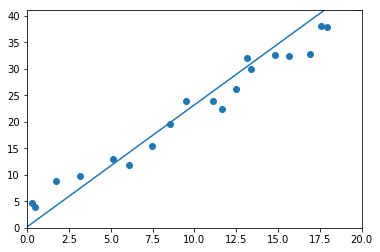

NameError: name 'time' is not defined

In [95]:
# 随机初始化参数
w = V(t.rand(1,1), requires_grad=True)
b = V(t.zeros(1,1), requires_grad=True)
lr =0.001 # 学习率
for ii in range(8000):
    x, y = get_fake_data()
    x, y = V(x), V(y)
    # forward：计算loss
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    # backward：手动计算梯度
    loss.backward()
    # 更新参数
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    # 梯度清零
    w.grad.data.zero_()
    b.grad.data.zero_()
    if ii%1000 ==0:
        # 画图
        display.clear_output(wait=True)
        x = t.arange(0, 20).view(-1, 1)
        y = x.mm(w.data) + b.data.expand_as(x)
        plt.plot(x.numpy(), y.numpy()) # predicted
        x2, y2 = get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        plt.xlim(0,20)
        plt.ylim(0,41)
        plt.show()
        plt.pause(0.5)
        
print(w.data.squeeze()[0], b.data.squeeze()[0])

# 全连接层（神经网络工具箱）

In [3]:
import torch as t
from torch import nn
from torch.autograd import Variable as V

In [2]:
class Linear(nn.Module): # 继承nn.Module
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__() # 等价于nn.Module.__init__(self)
        self.w = nn.Parameter(t.randn(in_features, out_features))# 将w封装成Parameter
        self.b = nn.Parameter(t.randn(out_features))# 将b封装成Parameter
    
    def forward(self, x):
        x = x.mm(self.w) # x.@(self.w) 这段什么意思
        return x + self.b.expand_as(x)

In [6]:
layer = Linear(4,3)# 4个输入，3个输出
input = V(t.randn(2,4))# 4个输入，输入了2次
output = layer(input)
output

tensor([[-1.8143,  0.4692, -0.4410],
        [-0.7742, -0.7019, -1.1366]])

In [4]:
for name, parameter in layer.named_parameters():
    print(name, parameter) # w and b 

w Parameter containing:
tensor([[ 2.1541, -1.5201, -0.0853],
        [-0.4178, -1.6190, -0.7864],
        [-0.1170,  0.6966, -0.2373],
        [-0.4831, -0.8131, -0.8169]])
b Parameter containing:
tensor([-0.4744, -0.3817,  0.2188])


# 多层感知机

In [7]:
class Perceptron(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        nn.Module.__init__(self)
        self.layer1 = Linear(in_features, hidden_features) # 此处的Linear是前面自定义的全连接层
        self.layer2 = Linear(hidden_features, out_features)
    def forward(self,x):
        x = self.layer1(x)
        x = t.sigmoid(x)
        return self.layer2(x)

In [8]:
perceptron = Perceptron(3,4,1)# 3个in 4个hi 1个out
for name, param in perceptron.named_parameters():
    print(name, param.size())

layer1.w torch.Size([3, 4])
layer1.b torch.Size([4])
layer2.w torch.Size([4, 1])
layer2.b torch.Size([1])


### 4.1 常用神经网络层
#### 4.1.1 图像相关层

图像相关层主要包括卷积层（Conv）、池化层（Pool）等，这些层在实际使用中可分为一维(1D)、二维(2D)、三维（3D），池化方式又分为平均池化（AvgPool）、最大值池化（MaxPool）、自适应池化（AdaptiveAvgPool）等。而卷积层除了常用的前向卷积之外，还有逆卷积（TransposeConv）。下面举例说明一些基础的使用。

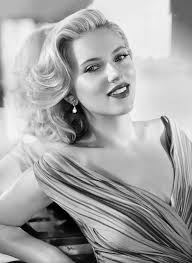

In [4]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
to_tensor = ToTensor() # img -> tensor
to_pil = ToPILImage()
anni = Image.open('C:/Users/yefci/Desktop/lab/sgaliGray.png')
anni

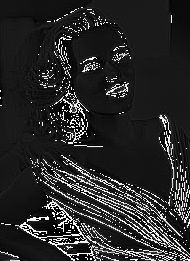

In [9]:
# 卷积层

# 输入是一个batch，batch_size＝1
input = to_tensor(anni).unsqueeze(0)

# 定义锐化卷积核
kernel = t.ones(3, 3)/-9.
kernel[1][1] = 1

conv = nn.Conv2d(1, 1, (3, 3), 1, bias=False)
conv.weight.data = kernel.view(1, 1, 3, 3)
out = conv(V(input))
to_pil(out.data.squeeze(0))

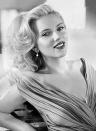

In [13]:
# 池化层

pool = nn.AvgPool2d(2,2)# 变小了
list(pool.parameters())

out = pool(V(input))
to_pil(out.data.squeeze(0))

In [14]:
# 输入 batch_size=2，维度3
input = V(t.randn(2, 3))
linear = nn.Linear(3, 4)
h = linear(input)
h

tensor([[-0.0551,  0.1574,  0.3943,  1.2670],
        [ 0.9518,  0.0048, -0.3682, -0.4939]])

In [15]:
# 4 channel，初始化标准差为4，均值为0
bn = nn.BatchNorm1d(4)
bn.weight.data = t.ones(4) * 4
bn.bias.data = t.zeros(4)
bn_out = bn(h)
# 注意输出的均值和方差
# 方差是标准差的平方，计算无偏方差分母会减1
# 使用unbiased=False 分母不减1
bn_out.mean(0), bn_out.var(0, unbiased=False)

(tensor([ 0.,  0.,  0.,  0.]),
 tensor([ 15.9994,  15.9726,  15.9989,  15.9998]))

In [16]:
# 每个元素以0.5的概率舍弃
dropout = nn.Dropout(0.5)
o = dropout(bn_out)
o # 有一半左右的数变为0

tensor([[-7.9998,  7.9931,  7.9997,  7.9999],
        [ 7.9998, -0.0000, -7.9997, -7.9999]])

# 激活函数ReLU

In [17]:
relu = nn.ReLU(inplace=True)
input = V(t.randn(2, 3))
print(input)
output = relu(input)
print(output) # 小于0的都被截断为0
# 等价于input.clamp(min=0)

tensor([[-0.2305, -0.3784,  0.4586],
        [ 2.1690, -0.6063,  2.2945]])
tensor([[ 0.0000,  0.0000,  0.4586],
        [ 2.1690,  0.0000,  2.2945]])


In [18]:
# Sequential的三种写法
net1 = nn.Sequential()
net1.add_module('conv', nn.Conv2d(3, 3, 3))
net1.add_module('batchnorm', nn.BatchNorm2d(3))
net1.add_module('activation_layer', nn.ReLU())

net2 = nn.Sequential(
    nn.Conv2d(3, 3, 3),
    nn.BatchNorm2d(3),
    nn.ReLU()
)

from collections import OrderedDict
net3= nn.Sequential(OrderedDict([
    ('conv1', nn.Conv2d(3, 3, 3)),
    ('bn1', nn.BatchNorm2d(3)),
    ('relu1', nn.ReLU())
]))

print('net1:', net1)
print('net2:', net2)
print('net3:', net3)

net1: Sequential(
  (conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation_layer): ReLU()
)
net2: Sequential(
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)
net3: Sequential(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
)


In [19]:
# 可根据名字或序号取出子module
net1.conv, net2[0], net3.conv1

(Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)),
 Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)),
 Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)))

In [20]:
input = V(t.rand(1, 3, 4, 4))
output = net1(input)
output = net2(input)
output = net3(input)
output = net3.relu1(net1.batchnorm(net1.conv(input)))

In [22]:
modellist = nn.ModuleList([nn.Linear(3,4), nn.ReLU(), nn.Linear(4,2)])
input = V(t.randn(1, 3))
for model in modellist:
    input = model(input)
# 下面会报错,因为modellist没有实现forward方法
# output = modelist(input)

In [2]:
# 激活函数

In [11]:
import torch as t
from torch.autograd import Variable
%matplotlib inline
from matplotlib import pyplot as plt
from torch import nn
import torch.nn.functional as F

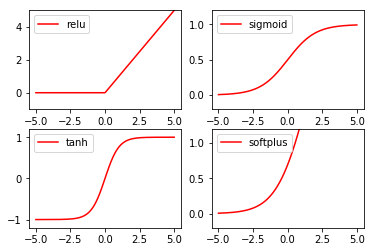

In [12]:
# fake data
x = t.linspace(-5, 5, 200)# x data(tensor), shape=(100,1)
x = Variable(x)
x_np = x.data.numpy()

y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

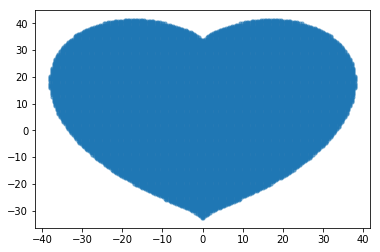

In [40]:
# 画心心
# (x**2 + y**2 - 1)**3 - (x**2) * (y**3) = 0
import numpy as np
import matplotlib.pyplot as plt
x_coords = np.linspace(-100, 100, 500)
y_coords = np.linspace(-100, 100, 500)

points = []

for y in y_coords:
    for x in x_coords:
        if (((x*0.03)**2 + (y*0.03)**2 - 1)**3 - (x*0.03)**2 * (y*0.03)**3)<= 0:
            points.append({"x":x, "y":y})

heart_x = list(map(lambda point:point["x"],points))
heart_y = list(map(lambda point:point["y"],points))

lenth = len(heart_x)

# plt.scatter(heart_x, heart_y, s=10, alpha=0.5)
# plt.show()

print("紫色 magma \n彩虹 rainbow \n青春 spring \n五彩 gist_rainbow \n橘黄 autumn \n红 Reds")
colormap = str(input("Enter the color of your heart:"))
plt.scatter(heart_x, heart_y, s=10, alpha=0.5, c=range(lenth), cmap=colormap)
plt.show()

In [1]:
import sys
sys.path.append('..')

import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torchvision.datasets import CIFAR10

def vgg_block(num_convs, in_channels, out_channels):
    net = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), nn.ReLU(True)] # 定义第一层
    
    for i in range(num_convs-1): # 定义后面的很多层
        net.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1))
        net.append(nn.ReLU(True))
        
    net.append(nn.MaxPool2d(2, 2)) # 定义池化层
    return nn.Sequential(*net)

block_demo = vgg_block(3, 64, 128)
print(block_demo)

Sequential(
  (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU(inplace)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [3]:
# 首先定义输入为 (1, 64, 300, 300)
input_demo = Variable(torch.zeros(1, 64, 300, 300))
print(input_demo.shape)
output_demo = block_demo(input_demo)
print(output_demo.shape)

torch.Size([1, 64, 300, 300])
torch.Size([1, 128, 150, 150])


In [4]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
torch: 0.1.11
"""
import torch
import torch.utils.data as Data

torch.manual_seed(1)    # reproducible

# 对于一大批数据量，分成小批训练

BATCH_SIZE = 5#每小批中的训练数量
# BATCH_SIZE = 8

x = torch.linspace(1, 10, 10)       # this is x data (torch tensor)用于训练
y = torch.linspace(10, 1, 10)       # this is y data (torch tensor)用于计算误差

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training是否打乱每次训练数据的顺序
    num_workers=2,              # subprocesses for loading data线程
)

for epoch in range(3):   # train entire dataset 3 times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        # train your data...
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())


Epoch:  0 | Step:  0 | batch x:  [  2.   7.  10.   1.   4.] | batch y:  [  9.   4.   1.  10.   7.]
Epoch:  0 | Step:  1 | batch x:  [ 3.  5.  6.  8.  9.] | batch y:  [ 8.  6.  5.  3.  2.]
Epoch:  1 | Step:  0 | batch x:  [ 7.  8.  2.  3.  9.] | batch y:  [ 4.  3.  9.  8.  2.]
Epoch:  1 | Step:  1 | batch x:  [  5.   1.   6.   4.  10.] | batch y:  [  6.  10.   5.   7.   1.]
Epoch:  2 | Step:  0 | batch x:  [  8.   1.   4.   9.  10.] | batch y:  [  3.  10.   7.   2.   1.]
Epoch:  2 | Step:  1 | batch x:  [ 7.  6.  5.  2.  3.] | batch y:  [ 4.  5.  6.  9.  8.]


In [16]:
import torch as t

a = t.linspace(1,16,16)
b = a.view(4,4)
print(b)
c = t.max(b,1)
print(c)
d = c[1]
print(d)
e = d.data.squeeze()
print(e)

TypeError: 'Tensor' object is not callable

In [2]:
f = t.clamp(b,8)
f

tensor([[  8.,   8.,   8.,   8.],
        [  8.,   8.,   8.,   8.],
        [  9.,  10.,  11.,  12.],
        [ 13.,  14.,  15.,  16.]])

In [13]:
g = (b==f).sum()# b和f中有多少个相同的元素
h = float(b.size(0))
print(g)
print(h)
print(g/h)

TypeError: 'Tensor' object is not callable